# Information Extraction with spaCy

### Fake News Corpus

For this example the data is from https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset.

In [1]:
import pandas as pd

news_fake = pd. read_csv('/Users/cindy/Corpora/Fake.csv') #my path
news_fake.insert(0, 'label', 0)
news_true = pd.read_csv('/Users/cindy/Corpora//True.csv') #my path
news_true.insert(0, 'label', 1)
news_df = pd.concat([news_true, news_fake], ignore_index=True)
news_df.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [2]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

## Shallow Parsing

Shallow parsing is between part-of-speech tagging and sentence parsing (next week).  

### Dependency Parsing

In [3]:
import spacy
from spacy import displacy

nlp = spacy.load('en_core_web_sm')

for sentence in news_df['title'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)
  
  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  Supreme Court sympathetic to property owner in wetlands dispute


Sentence is:  LAWS ARE FOR THE COMMON MAN…NOT FOR BARRY SOETORO: Obama Gives Work Permits To 2,000 After Judge Ordered Him To Stop


Sentence is:  Turkey 'appalled' by U.S. stance on IS withdrawal from Raqqa: ministry


Sentence is:  Germany extends passport controls on Austrian border, flights from Greece


Sentence is:   Ted Cruz: I’m ‘Honored’ By Support Of This Demon-Obsessed Exorcist Preacher (VIDEO)


### Noun Chunks

spaCy provides access to noun chunks without having to navigate the parse tree


In [4]:
for sentence in news_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  Supreme Court sympathetic to property owner in wetlands dispute
Chunked noun phrases found:  Supreme Court sympathetic
Chunked noun phrases found:  property owner
Chunked noun phrases found:  wetlands dispute

Sentence is:  LAWS ARE FOR THE COMMON MAN…NOT FOR BARRY SOETORO: Obama Gives Work Permits To 2,000 After Judge Ordered Him To Stop
Chunked noun phrases found:  LAWS
Chunked noun phrases found:  THE COMMON MAN
Chunked noun phrases found:  BARRY SOETORO
Chunked noun phrases found:  Obama
Chunked noun phrases found:  Work Permits
Chunked noun phrases found:  Judge
Chunked noun phrases found:  Him

Sentence is:  Turkey 'appalled' by U.S. stance on IS withdrawal from Raqqa: ministry
Chunked noun phrases found:  Turkey
Chunked noun phrases found:  U.S. stance
Chunked noun phrases found:  IS withdrawal
Chunked noun phrases found:  Raqqa
Chunked noun phrases found:  ministry

Sentence is:  Germany extends passport controls on Austrian border, flights from Greece
Chunked nou

## NER with spaCy

[spaCy](https://spacy.io/usage/linguistic-features#named-entities) provides a robust entity recognition system.  

In [5]:
# random titles
for sentence in news_df['title'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  Supreme Court sympathetic to property owner in wetlands dispute



Sentence is:  LAWS ARE FOR THE COMMON MAN…NOT FOR BARRY SOETORO: Obama Gives Work Permits To 2,000 After Judge Ordered Him To Stop



Sentence is:  Turkey 'appalled' by U.S. stance on IS withdrawal from Raqqa: ministry



Sentence is:  Germany extends passport controls on Austrian border, flights from Greece



Sentence is:   Ted Cruz: I’m ‘Honored’ By Support Of This Demon-Obsessed Exorcist Preacher (VIDEO)


In [6]:
#sample article text
article = [doc for doc in  news_df['text'].sample(1, random_state=5)]
sample_article = article[0]
print("Article is: ", sample_article)
article_doc = nlp(sample_article)
displacy.render(article_doc,style='ent',jupyter=True)

Article is:  WASHINGTON (Reuters) - The U.S. Supreme Court on Wednesday appeared likely to rule that property owners can challenge the federal government in court over the need for permits under a national water protection law in a case involving a company’s plans for a Minnesota peat mine. The court heard a one-hour argument in a case balancing property rights and environmental law, in this instance the landmark 1972 U.S. Clean Water Act. A majority of the eight justices appeared sympathetic toward North Dakota-based Hawkes Co Inc, which is fighting an Obama administration finding that its property includes wetlands. The law mandates that property owners get permits in such situations. Whether a particular plot of land falls under the law’s jurisdiction is important to developers and other property owners because such a finding triggers a lengthy and expensive permitting process. Hawkes’ lawyers argued the company should be able to contest whether it even needs to go through the permi

In [7]:
# list entities
article_doc.ents

(WASHINGTON,
 Reuters,
 The U.S. Supreme Court,
 Wednesday,
 Minnesota,
 one-hour,
 1972,
 U.S.,
 Clean Water Act,
 eight,
 North Dakota,
 Hawkes Co Inc,
 John Roberts,
 Ruth Bader Ginsburg,
 Liberal Stephen Breyer,
 Hawkes,
 Elena Kagan,
 the Securities and Exchange Commission,
 two years,
 up to $270,000,
 up to $37,500,
 the National Association of Home Builders,
 the U.S. Chamber of Commerce,
 29,
 Obama,
 2012,
 the Clean Water Act,
 Obama,
 last year,
 18,
 Only eight,
 Antonin Scalia,
 February,
 the end of June)

**Retrieve all named entities from 1000 random documents.**

Entities have many attributes.  We'll use the following:
- text (the word or words)
- starting character position
- ending character position
- label (named entity)


You can also access IOB tags.

In [8]:
sample = news_df.sample(1000)
frames = []

for idx in sample.index.values:
    doc = sample['title'][idx]
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text) > 0]
    frame = pd.DataFrame(ents)
    frame['id']= idx
    frames.append(frame)

In [9]:
ner = pd.concat(frames,ignore_index=True)
ner.columns = ['Text','Start','Stop','NER_Type','id']
ner.tail()

,Text,Start,Stop,NER_Type,id
1950,Republican,22.0,32.0,NORP,8737
1951,Scooby Doo’s,1.0,13.0,ORG,29044
1952,100,50.0,53.0,CARDINAL,29044
1953,MPH,54.0,57.0,ORG,29044
1954,Getaway,58.0,65.0,ORG,29044


<AxesSubplot:xlabel='NER Types', ylabel='Counts'>

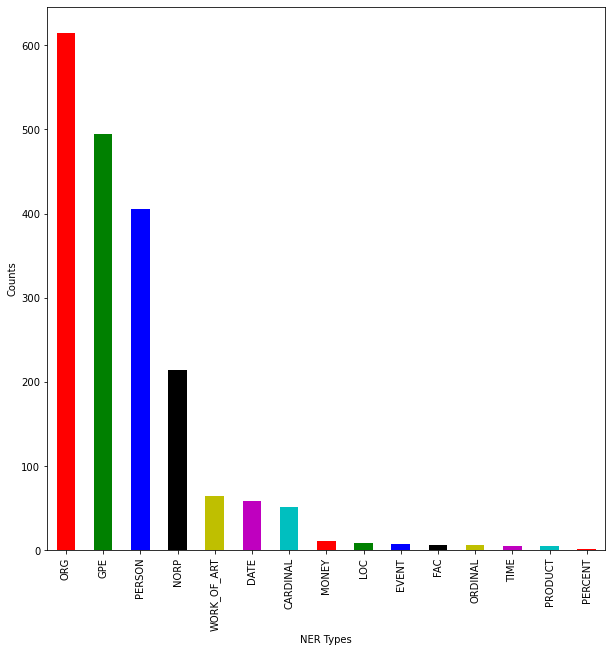

In [10]:
import matplotlib.pyplot as plt
color_list = list('rgbkymc')  #red, green, blue, black, etc.
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

<AxesSubplot:xlabel='Top 20 people mentioned', ylabel='Counts'>

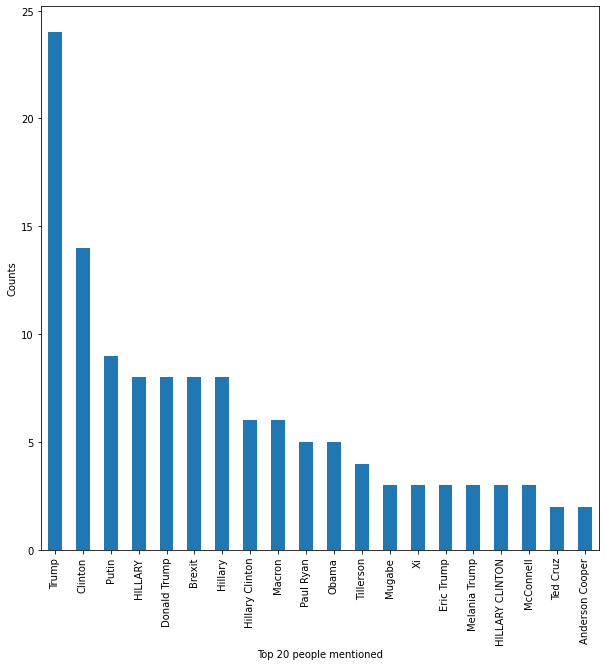

In [11]:
person = ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 people mentioned")
plt.ylabel("Counts")

person.Text.value_counts()[:20].plot(kind='bar')

<AxesSubplot:xlabel='Top 20 Places mentioned', ylabel='Counts'>

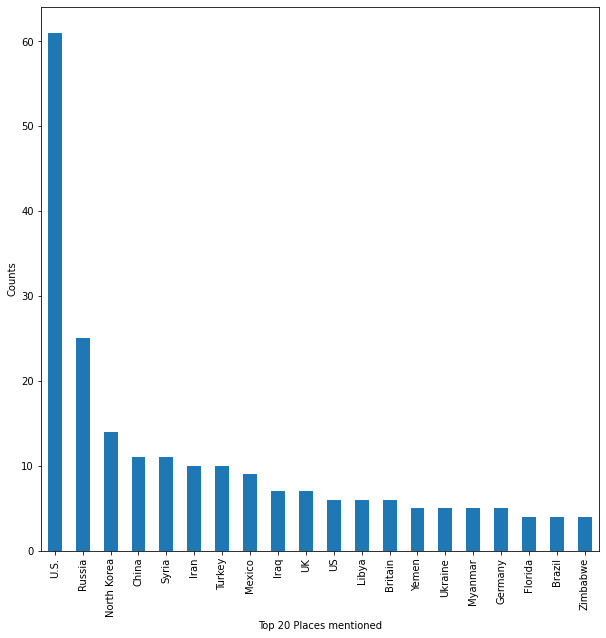

In [12]:
place = ner[ner.NER_Type == 'GPE']
plt.figure(figsize=(10,10))
plt.xlabel("Top 20 Places mentioned")
plt.ylabel("Counts")

place.Text.value_counts()[:20].plot(kind='bar')

Reference:  [Women Who Code Data Science](https://github.com/WomenWhoCode/WWCodeDataScience)